In [271]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout

In [272]:
tensorflow.random.set_seed(42)

In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [274]:
data=pd.read_csv('/content/heart disease classification dataset (2).csv')

In [275]:
data.head(1)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes


In [276]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes


In [277]:
data.duplicated().sum()

np.int64(1)

In [278]:
data.shape

(303, 14)

In [279]:
data.drop_duplicates(keep='first',inplace=True)
data.duplicated().sum()

np.int64(0)

In [280]:
data.shape

(302, 14)

In [281]:
data.isnull().sum().sort_values(ascending=False)

,0
thalach,5
trestbps,4
chol,1
sex,0
cp,0
age,0
fbs,0
restecg,0
exang,0
oldpeak,0


In [282]:
mean_thalach=data['thalach'].mean()
mean_trestbps=data['trestbps'].mean()
mean_chol=data['chol'].mean()

In [283]:
data['thalach'].fillna(mean_thalach,inplace=True)
data['trestbps'].fillna(mean_trestbps,inplace=True)
data['chol'].fillna(mean_chol,inplace=True)

/tmp/ipython-input-3051275424.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['thalach'].fillna(mean_thalach,inplace=True)
/tmp/ipython-input-3051275424.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [284]:
data.isnull().sum().sum()

np.int64(0)

In [285]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    object 
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    float64
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    object 
dtypes: float64(4), int64(8), object(2)
memory usage: 35.4+ KB


In [286]:
data.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes


In [287]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [288]:
trf=ColumnTransformer(
  transformers=[('OneHot',OneHotEncoder(drop='first'),['sex'])],
  remainder='passthrough'
)

In [289]:
trf

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHot', OneHotEncoder(drop='first'),
                                 ['sex'])])

In [290]:
data.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes


In [291]:
from sklearn.model_selection import train_test_split
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [292]:
# X_train
# X_test
# y_train
# # y_test

In [293]:
trf.fit(X_train)
X_train_trf=trf.transform(X_train)
X_test_trf=trf.transform(X_test)

In [294]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y_train)
y_train=le.transform(y_train)
y_test=le.transform(y_test)

In [295]:
X_train.shape

(241, 13)

In [296]:
model=Sequential()
model.add(Dense(32,activation='selu',input_dim=13,kernel_regularizer=keras.regularizers.L2))
model.add(Dropout(0.3))
model.add(Dense(32,activation='selu',kernel_regularizer=keras.regularizers.L2))
model.add(Dropout(0.3))
model.add(Dense(32,activation='selu',kernel_regularizer=keras.regularizers.L2))
model.add(Dropout(0.3))
model.add(Dense(32,activation='selu',kernel_regularizer=keras.regularizers.L2))
model.add(Dropout(0.3))
model.add(Dense(32,activation='selu',kernel_regularizer=keras.regularizers.L2))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid',kernel_regularizer=keras.regularizers.L2))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_55 (Dense)                │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,705 (18.38 KB)

 Trainable params: 4,705 (18.38 KB)

 Non-trainable params: 0 (0.00 B)

In [297]:
model.compile(loss=keras.losses.BinaryCrossentropy(),optimizer='Adam',metrics=['accuracy'])

In [298]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train_trf)
X_train_scaled=sc.transform(X_train_trf)
X_test_scaled=sc.transform(X_test_trf)

In [299]:
X_train_scaled.shape

(241, 13)

In [300]:
history=model.fit(X_train_scaled,y_train,epochs=50,batch_size=1,validation_data=(X_test_scaled,y_test))

Epoch 1/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5976 - loss: 2.1755 - val_accuracy: 0.8361 - val_loss: 1.7308
Epoch 2/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7072 - loss: 1.8946 - val_accuracy: 0.8361 - val_loss: 1.6127
Epoch 3/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7326 - loss: 1.8152 - val_accuracy: 0.8689 - val_loss: 1.5117
Epoch 4/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7963 - loss: 1.5795 - val_accuracy: 0.8197 - val_loss: 1.4451
Epoch 5/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7656 - loss: 1.6019 - val_accuracy: 0.8525 - val_loss: 1.3531
Epoch 6/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8401 - loss: 1.4379 - val_accuracy: 0.8525 - val_loss: 1.2705
Epoch 7/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8377 - loss: 1.2970 - val_accuracy: 0.8361 - val_loss: 1.2060
Epoch 8/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7774 - loss: 1.2520 - val_accuracy: 0.

In [301]:
yp=model.predict(X_test_scaled)
type(yp)
y_pred=np.where(yp>0.5,1,0)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


In [302]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_test,y_pred)

0.819672131147541

In [303]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



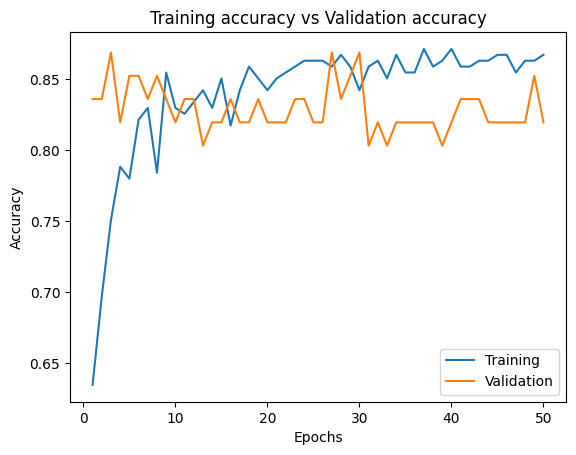

In [304]:
plt.title('Training accuracy vs Validation accuracy')
plt.plot(np.arange(1,51),history.history['accuracy'],label='Training')
plt.plot(np.arange(1,51),history.history['val_accuracy'],label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

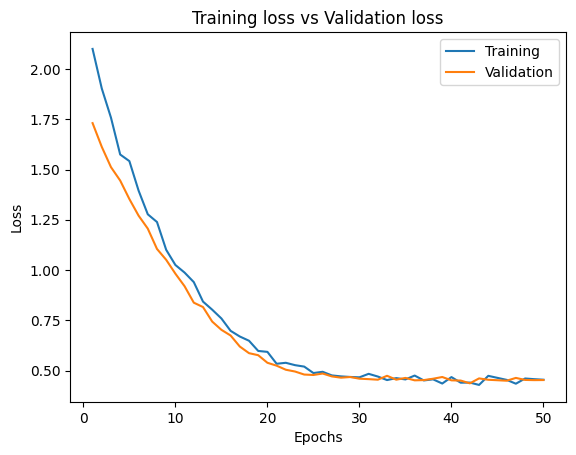

In [305]:
plt.title('Training loss vs Validation loss')
plt.plot(np.arange(1,51),history.history['loss'],label='Training')
plt.plot(np.arange(1,51),history.history['val_loss'],label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()